## Titanic EDA (Exploratory data analysis)

#        [Data Dictionary]
Variable    Definition  Key
survival    Survival    0 = No, 1 = Yes
pclass  Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex Sex
Age Age in years    
sibsp   # of siblings / spouses aboard the Titanic  
parch   # of parents / children aboard the Titanic  
ticket  Ticket number   
fare    Passenger fare  
 cabin   Cabin number
    
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#      [Variable Notes]

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:

# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:

# Load dataset
df_titanic = sns.load_dataset('titanic')

In [ ]:

# show dataset
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [ ]:
df_titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df_titanic.shape

(891, 15)

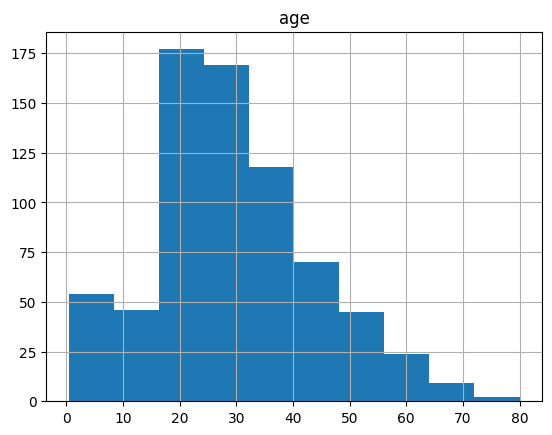

In [ ]:
df_titanic.hist(column="age")
plt.show()

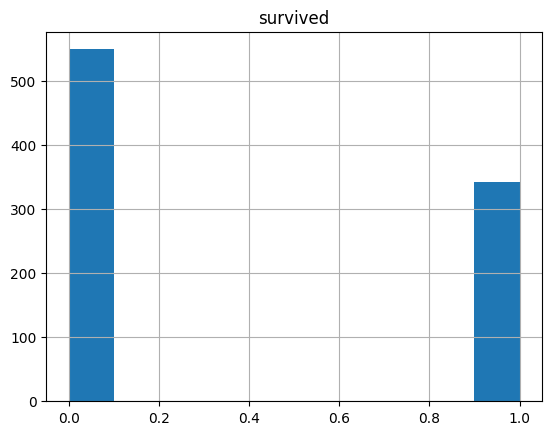

In [ ]:
df_titanic.hist(column= "survived")
plt.show()

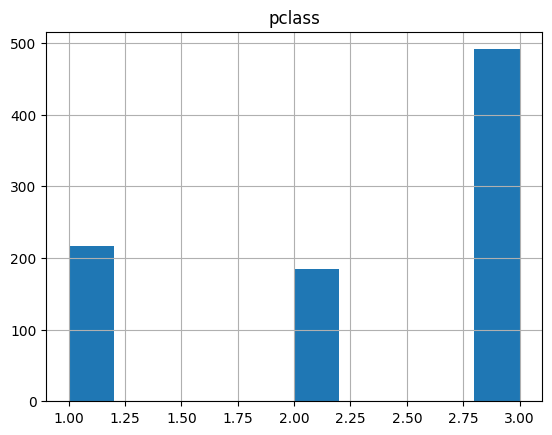

In [ ]:
df_titanic.hist(column="pclass")
plt.show()

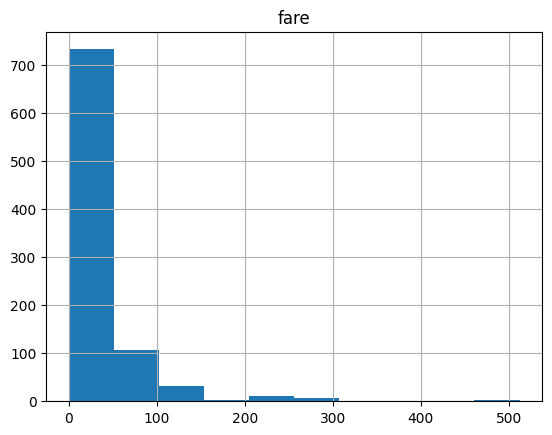

In [ ]:
df_titanic.hist(column= "fare")
plt.show()

In [ ]:

# showing info
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:

# check Null values
df_titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#titanic["age"].mean()
df_titanic["age"].median()
#titanic ["age"].mode()

28.0

In [ ]:

#check statistical analysis
df_titanic.describe()

In [ ]:
df_titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df_titanic.head()

In [ ]:
df_titanic.describe(include = "all")

In [ ]:
df_titanic.isnull().sum()

In [ ]:
# Show unique count

df_titanic.nunique().sum()

382

In [ ]:
df_titanic.dtypes

In [ ]:
# Age Histogram
plt.hist(df_titanic.age)
plt.axvline(df_titanic.age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in years)')
plt.show()

In [ ]:
# fare Histogram

plt.hist(titanic.fare)
plt.axvline(df_titanic.fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fares of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Fare (in Dollars)')
plt.show()

In [ ]:
# Age
#plt.axvline(df_titanic.age.mean()+df_titanic.age.std(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(df_titanic.age.mean()-df_titanic.age.std(), color='k', linestyle='dashed', linewidth=1)
#plt.show()

In [ ]:
# Fare
#plt.axvline(titanic.fare.mean()+titanic.fare.std(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(titanic.fare.mean()-titanic.fare.std(), color='k', linestyle='dashed', linewidth=1)
#plt.show()

# Suggested Columns to Drop:

class

alive

who

deck

embark_town

alone

In [ ]:
# drop the unnecessary columns
columns_to_drop = ['class', 'alive', 'who', 'deck', 'embark_town', 'alone']
df_cleaned = df_titanic.drop(columns=columns_to_drop)

In [ ]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


# Fill missing values:

median for numeric, mode for categorical

age/_ float64_177

embarked/_object_2

In [ ]:
df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())
df_cleaned['embarked'] = df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0])

In [ ]:

# show the cleaned dataset
df_cleaned.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
adult_male,0


In [ ]:
# Encode categorical variables
#df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'embarked'], drop_first=True)

In [ ]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [ ]:
#df_titanic['survived'].corr(df_titanic['age'])
#df_titanic['survived'].corr(df_titanic['pclass'])
#df_titanic['survived'].corr(df_titanic['fare'])
df_titanic['survived'].corr(df_titanic['parch'])

0.08162940708348371

In [ ]:
#save the cleaned dataset
df_cleaned.to_csv('titanic_cleaned.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the cleaned dataset to Google Drive
df_cleaned.to_csv('/content/drive/My Drive/titanic_cleaned.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# download cleaned dataset to local drive
from google.colab import files

files.download('titanic_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
titanic_cleaned = pd.read_csv('titanic_cleaned2.csv')

In [ ]:
titanic_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [ ]:
# One-Hot Encoding for 'sex' and 'embarked'
titanic_cleaned = pd.get_dummies(titanic_cleaned, columns=['sex', 'embarked'], drop_first=True)

# Label Encoding for 'pclass' (ordinal variable)
le = LabelEncoder()
titanic_cleaned['pclass'] = le.fit_transform(titanic_cleaned['pclass'])

# Display the transformed dataset
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S
0,0,2,22.0,1,0,7.2500,True,True,False,True
1,1,0,38.0,1,0,71.2833,False,False,False,False
2,1,2,26.0,0,0,7.9250,False,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,False,True
4,0,2,35.0,0,0,8.0500,True,True,False,True


In [ ]:
# Define ordinal and non-ordinal columns
ordinal_columns = ['pclass']  # Add more if needed
non_ordinal_columns = ['sex', 'embarked',]

# Label Encoding for Ordinal Columns
for col in ordinal_columns:
      titanic_cleaned[col] = LabelEncoder().fit_transform(titanic_cleaned[col])

# One-Hot Encoding for Non-Ordinal Columns
titanic_cleaned = pd.get_dummies(titanic_cleaned, columns=non_ordinal_columns, drop_first=True)

# Check the transformed dataset
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S
0,0,2,22.0,1,0,7.2500,True,True,False,True
1,1,0,38.0,1,0,71.2833,False,False,False,False
2,1,2,26.0,0,0,7.9250,False,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,False,True
4,0,2,35.0,0,0,8.0500,True,True,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select the numerical columns to normalize
numerical_cols = ['age', 'fare']

# Apply Standard Scaling to the selected columns
titanic_cleaned[numerical_cols] = scaler.fit_transform(titanic_cleaned[numerical_cols])

# Verify the result
titanic_cleaned[numerical_cols].head()

,age,fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


In [ ]:
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S
0,0,2,-0.565736,1,0,-0.502445,True,True,False,True
1,1,0,0.663861,1,0,0.786845,False,False,False,False
2,1,2,-0.258337,0,0,-0.488854,False,False,False,True
3,1,0,0.433312,1,0,0.420730,False,False,False,True
4,0,2,0.433312,0,0,-0.486337,True,True,False,True


In [ ]:
titanic_cleaned.groupby('fare')['survived'].mean()

,survived
fare,
-0.648422,0.066667
-0.567631,0.000000
-0.547748,0.000000
-0.522832,0.000000
-0.518805,0.000000
...,...
3.932723,0.750000
4.335332,0.500000
4.634417,1.000000


In [ ]:
titanic_cleaned.groupby('pclass')['survived'].mean()

,survived
pclass,
0,0.629630
1,0.472826
2,0.242363


In [ ]:
titanic_cleaned['age_group'] = pd.cut(
    titanic_cleaned['age'],
    bins=[0, 12, 18, 35, 60, 80],
    labels=['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
)

In [ ]:
titanic_cleaned[['age', 'age_group']].head()

,age,age_group
0,-0.565736,NaN
1,0.663861,Child
2,-0.258337,NaN
3,0.433312,Child
4,0.433312,Child


In [ ]:
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,age_group
0,0,2,-0.565736,1,0,-0.502445,True,True,False,True,NaN
1,1,0,0.663861,1,0,0.786845,False,False,False,False,Child
2,1,2,-0.258337,0,0,-0.488854,False,False,False,True,NaN
3,1,0,0.433312,1,0,0.420730,False,False,False,True,Child
4,0,2,0.433312,0,0,-0.486337,True,True,False,True,Child


In [ ]:
titanic_cleaned.isna().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
sex_male,0
embarked_Q,0
embarked_S,0


In [ ]:

# Drop the 'age_group' column
titanic_cleaned = titanic_cleaned.drop('age_group', axis=1)

In [ ]:
titanic_cleaned.isna().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
sex_male,0
embarked_Q,0
embarked_S,0


In [ ]:
titanic_cleaned['family_size'] = titanic_cleaned['sibsp'] + titanic_cleaned['parch']

titanic_cleaned.groupby('family_size')['survived'].mean()

,survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [ ]:

# Create fare ranges
titanic_cleaned['fare_group'] = pd.qcut(titanic_cleaned['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

titanic_cleaned.groupby('fare_group', observed= False)['survived'].mean()

,survived
fare_group,
Low,0.197309
Medium,0.303571
High,0.454955
Very High,0.581081


In [ ]:
titanic_cleaned.groupby('embarked_Q')['survived'].mean()

,survived
embarked_Q,
False,0.383292
True,0.389610


In [ ]:
titanic_cleaned.groupby('embarked_S')['survived'].mean()

,survived
embarked_S,
False,0.502041
True,0.339009


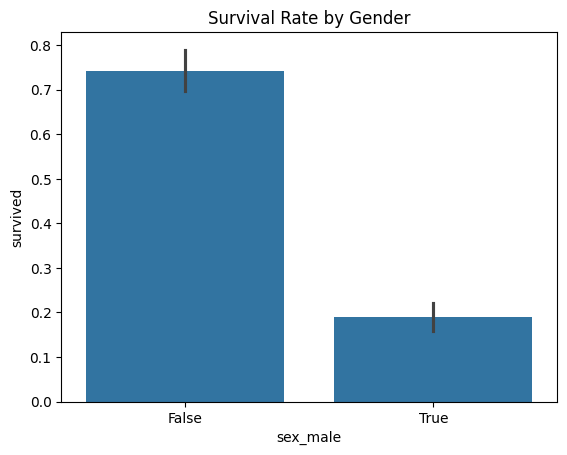

In [ ]:
# Survival by Gender
sns.barplot(x='sex_male', y='survived', data=titanic_cleaned)
plt.title('Survival Rate by Gender')
plt.show()

In [ ]:
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,family_size,fare_group
0,0,2,-0.565736,1,0,-0.502445,True,True,False,True,1,Low
1,1,0,0.663861,1,0,0.786845,False,False,False,False,1,Very High
2,1,2,-0.258337,0,0,-0.488854,False,False,False,True,0,Medium
3,1,0,0.433312,1,0,0.420730,False,False,False,True,1,Very High
4,0,2,0.433312,0,0,-0.486337,True,True,False,True,0,Medium


In [ ]:
# Check new column names
titanic_cleaned.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'sex_male', 'embarked_Q', 'embarked_S', 'family_size', 'fare_group'],
      dtype='object')

In [ ]:
titanic_cleaned.isna().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
family_size,0
fare_group,0
sex_male_True,0


In [ ]:
# Convert boolean columns to integers if necessary
bool_cols = ['adult_male', 'sex_male']
titanic_cleaned[bool_cols] = titanic_cleaned[bool_cols].astype(int)

In [ ]:
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,family_size,fare_group
0,0,2,-0.565736,1,0,-0.502445,1,1,False,True,1,Low
1,1,0,0.663861,1,0,0.786845,0,0,False,False,1,Very High
2,1,2,-0.258337,0,0,-0.488854,0,0,False,True,0,Medium
3,1,0,0.433312,1,0,0.420730,0,0,False,True,1,Very High
4,0,2,0.433312,0,0,-0.486337,1,1,False,True,0,Medium


In [ ]:
le = LabelEncoder()
titanic_cleaned['fare_group'] = le.fit_transform(titanic_cleaned['fare_group'])

# Check the mapping of categories to numbers
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High': 0, 'Low': 1, 'Medium': 2, 'Very High': 3}


In [ ]:
titanic_cleaned.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,family_size,fare_group
0,0,2,-0.565736,1,0,-0.502445,1,1,False,True,1,1
1,1,0,0.663861,1,0,0.786845,0,0,False,False,1,3
2,1,2,-0.258337,0,0,-0.488854,0,0,False,True,0,2
3,1,0,0.433312,1,0,0.420730,0,0,False,True,1,3
4,0,2,0.433312,0,0,-0.486337,1,1,False,True,0,2


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# Features and target
X = titanic_cleaned.drop(columns=['survived'])  # Drop the target column
y = titanic_cleaned['survived']                # Target variable

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (712, 11)
Test set size: (179, 11)


In [ ]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Predict probabilities (for ROC-AUC or thresholding later)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results in a structured format
conf_matrix, accuracy, precision, recall, f1

(array([[89, 16],
        [19, 55]]),
 0.8044692737430168,
 0.7746478873239436,
 0.7432432432432432,
 0.7586206896551724)

In [ ]:

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Display the score
roc_auc

0.8765765765765766

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
feature_importance

,Feature,Coefficient
4,fare,0.204692
3,parch,-0.027749
10,fare_group,-0.066470
1,age,-0.163648
2,sibsp,-0.199981
9,family_size,-0.227730
7,embarked_Q,-0.240084
8,embarked_S,-0.384115
6,sex_male,-0.450204
0,pclass,-0.904298
